# **Simulação de carteira Buy and Hold**

# *1. Importação das Bibliotecas*

In [12]:
import yfinance as yf 
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import mplcyberpunk

## *2. Configuração de uma Carteira Ficticia.*

In [13]:
compras = {'VALE3.SA': 2000, 
           'PETR4.SA': 2000, 
           'WEGE3.SA': 2000,
           'HGLG11.SA': 1000,
           'SMAL11.SA': 2000, 
           'MSFT34.SA': 2000}

In [14]:
list(compras.keys())

['VALE3.SA', 'PETR4.SA', 'WEGE3.SA', 'HGLG11.SA', 'SMAL11.SA', 'MSFT34.SA']

In [15]:
sum(compras.values())

11000

## *3. Importando os dados*

In [16]:
inicio = '2020-03-10'
fim = '2023-10-20'

In [17]:
precos = yf.download(list(compras.keys()), start = inicio, end = fim, progress = False)['Adj Close']

## *4. Simulação da Carteira Ficticia*


In [18]:
primeiro = precos.iloc[0]

In [19]:
compras_df = pd.Series(data = compras, index = list(compras.keys()))

### *Ajustando a Quantidade de ações ao código*

In [20]:
qtd_acoes = round(compras_df/primeiro, 0)

In [21]:
PL = precos*qtd_acoes

In [22]:
PL['PL Total'] = PL.sum(axis = 1)

In [23]:
PL.head()

,HGLG11.SA,MSFT34.SA,PETR4.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,
2020-03-10,1004.027786,1990.429623,1996.983843,1989.000000,2008.079102,1993.549347,10982.069701
2020-03-11,989.728394,1954.571854,1802.516699,1845.000000,1825.689331,1864.642143,10282.148420
2020-03-12,910.549866,1842.613607,1432.915538,1573.200027,1584.145996,1569.723606,8913.148641
2020-03-13,920.418076,1960.119831,1751.340902,1755.000000,1922.485596,1642.502213,9951.866617
2020-03-16,862.688690,1626.464207,1488.639951,1449.000000,1749.506714,1303.822231,8480.121793


In [24]:
PL.tail()

,HGLG11.SA,MSFT34.SA,PETR4.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,
2023-10-13,1089.236038,4650.545387,10795.721684,1746.000000,4219.865723,3447.103500,25948.472332
2023-10-16,1092.321609,4666.602242,10914.748638,1769.400055,4264.859863,3458.081436,26166.013844
2023-10-17,1095.750046,4650.545387,11209.339703,1738.079956,4299.713379,3421.155167,26414.583637
2023-10-18,1092.115997,4646.530663,11462.271687,1691.099945,4141.919922,3422.153473,26456.091686
2023-10-19,1089.853088,4665.933121,11408.709675,1688.400055,4082.351318,3387.223053,26322.470310


## *5. Comparação com IBOV*

In [25]:
ibov = yf.download('^BVSP', start = inicio, end = fim)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [26]:
ibov.head()

Date
2020-03-10    92214.0
2020-03-11    85171.0
2020-03-12    72583.0
2020-03-13    82678.0
2020-03-16    71168.0
Name: Adj Close, dtype: float64

In [27]:
ibov = pd.DataFrame(ibov)

In [28]:
ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)

### *Organizando Tudo em um Dataframe único*

In [29]:
consolidado = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [30]:
consolidado.head()

,IBOV,HGLG11.SA,MSFT34.SA,PETR4.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,
2020-03-10,92214.0,1004.027786,1990.429623,1996.983843,1989.000000,2008.079102,1993.549347,10982.069701
2020-03-11,85171.0,989.728394,1954.571854,1802.516699,1845.000000,1825.689331,1864.642143,10282.148420
2020-03-12,72583.0,910.549866,1842.613607,1432.915538,1573.200027,1584.145996,1569.723606,8913.148641
2020-03-13,82678.0,920.418076,1960.119831,1751.340902,1755.000000,1922.485596,1642.502213,9951.866617
2020-03-16,71168.0,862.688690,1626.464207,1488.639951,1449.000000,1749.506714,1303.822231,8480.121793


### *Normalizando os Dados para ajustar a Escala*

In [31]:
consolidado_ajustado = consolidado/consolidado.iloc[0]

<Axes: xlabel='Date'>

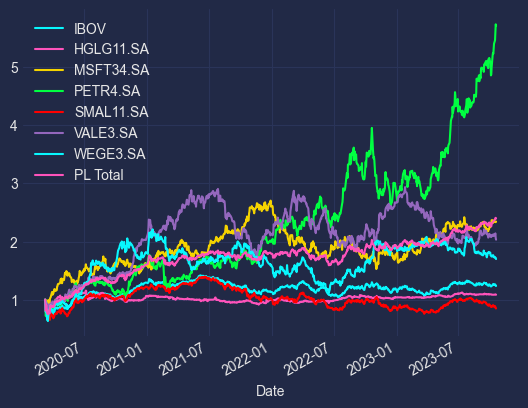

In [38]:
plt.style.use("cyberpunk");
consolidado_ajustado.plot()

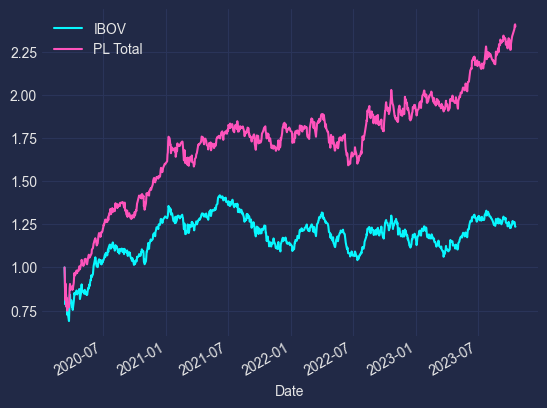

In [32]:
plt.style.use("cyberpunk");
consolidado_ajustado[['IBOV', 'PL Total']].plot();